In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Example HTML string

In [2]:
from IPython.display import HTML

htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p><strong>Hello world!<strong></p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput



### Scraping Beautiful Soup website

In [3]:
url = 'http://www.crummy.com/software/BeautifulSoup'
get_page = requests.get(url)


In [5]:
get_page.text[:1000]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"\n"http://www.w3.org/TR/REC-html40/transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>Beautiful Soup: We called him Tortoise because he taught us.</title>\n<link rev="made" href="mailto:leonardr@segfault.org">\n<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">\n<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">\n<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">\n<meta name="author" content="Leonard Richardson">\n</head>\n<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">\n<style>\n#tidelift { }\n\n#tidelift a {\n border: 1px solid #666666;\n margin-left: auto;\n padding: 10px;\n text-decoration: none;\n}\n\n#tidelift .cta {\n background: url("tidelift.svg") no-repeat;\n padding-left: 30px;\n}\n</style>\t\t   \n\n<img align="right" src="10

Quiz

- Is the word 'Alice' mentioned on the beautiful soup homepage?
- How often does the word 'Soup' occur on the site? hint: use .count()
- At what index occurs the substring 'alien video games' ? hint: use .find()


Answer 1

In [7]:
print('Alice' in get_page.text)

False


Answer 2

How often does the word 'Soup' occur on the site? hint: use .count()

In [8]:
get_page.text.count('Soup')

49

Answer 3

At what index occurs the substring 'Soup' ? hint: use .find()

In [21]:
get_page.text.find('Soup')

213

Get the word.

In [23]:
get_page.text[213:213+4]

'Soup'

Get all the links from our page.

In [25]:
soup = BeautifulSoup(get_page.text, 'lxml')
soup.find_all('a')

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 gr

Get the link attributes from our soup object.

In [26]:
link_list = [l.get('href') for l in soup.find_all('a')]
link_list

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_sourc

Getting only the valid external links.

In [38]:
external_links = []

for i in link_list:
    if i is not None and i[:4] == 'http':
        external_links.append(i)
    

In [39]:
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

In [48]:
entry_point = soup.find('ul')
entry_point

<ul>
<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.

</li><li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li><li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li><li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li><li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li><li

In [54]:
tmp = []
for i in entry_point.contents:
    tmp.append(i)

In [55]:
tmp

['\n',
 <li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
  Type"</a>, a work of digital art on display in the lobby of the New
  York Times building, uses Beautiful Soup to scrape news feeds.
 
 </li>,
 <li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
 a page that's been linked to and find a representative image</a>.
 
 </li>,
 <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
  activities</a> of an arms merchant.
 
 </li>,
 <li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
 bug tracker from Sourceforge to Roundup</a>.
 
 </li>,
 <li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
 uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
 statewide e

#### Advanced Example

##### Scraping data science skills from Indeed.com

Get the website data.

In [287]:
from urllib.request import urlopen
my_url = 'https://www.indeed.com/jobs?q="data+scientist"&l=New+York%2C+NY'
source = urlopen(my_url).read()

soup = BeautifulSoup(source, 'lxml')

Find out how many jobs are listed on Indeed.

In [288]:
soup.find(id='searchCountPages').contents[0].strip()

'Page 1 of 868 jobs'

In [289]:
num_of_jobs = soup.find(id='searchCountPages').contents[0].strip().split()[-2]
num_of_jobs = int(num_of_jobs.replace(',',''))

print(f"There are {num_of_jobs} Data Scientits jobs listed on Indeed.com in New York City")

There are 868 Data Scientits jobs listed on Indeed.com in New York City


The website lists only 10 jobs per page. We will get all the listing.

In [291]:
import time

def get_indeed():

    num_pages = int(np.ceil(num_of_jobs)/10)
    
    base_url = "http://www.indeed.com"


    # We will get results for only first 20 pages
    for i in range(num_pages):

        url = 'https://www.indeed.com/jobs?q="data+scientist"&l=New+York%2C+NY&start=' + str(i*10)

        html_page = requests.get(url).text
        soup = BeautifulSoup(html_page)
        job_link_area = soup.find(id = 'resultsCol')
        job_postings = job_link_area.find_all('div')
        _blank = []
        for jp in job_postings:
            if jp.get('class'):
                _ = jp.find('a', class_ = "jobtitle turnstileLink ")
                _blank.append((_))
                
        _title = []
        _links = []
        for ix in _blank:
            if ix != None:
                _title.append(ix.text)
                _links.append(ix['href'])
                
        _title = [t.strip() for t in _title]
        _links = [i for i in _links if i[:8] != '/pagead/']
        
        _title = list(set(_title))
        _links = list(set(_links))
        _links = [str("https://www.indeed.com") + i for i in _links]
        
        title.append(_title)
        links.append(_links)
        
        sleep = np.random.randint(low = 1, high = 4, size = 1)
        
        print(f"Finished gathering data for page {i}")
                
        time.sleep(sleep)
                
            
            

    
    

In [292]:
title = []
links = []
get_indeed()

Finished gathering data for page 0
Finished gathering data for page 1
Finished gathering data for page 2
Finished gathering data for page 3
Finished gathering data for page 4
Finished gathering data for page 5
Finished gathering data for page 6
Finished gathering data for page 7
Finished gathering data for page 8
Finished gathering data for page 9
Finished gathering data for page 10
Finished gathering data for page 11
Finished gathering data for page 12
Finished gathering data for page 13
Finished gathering data for page 14
Finished gathering data for page 15
Finished gathering data for page 16
Finished gathering data for page 17
Finished gathering data for page 18
Finished gathering data for page 19
Finished gathering data for page 20
Finished gathering data for page 21
Finished gathering data for page 22
Finished gathering data for page 23
Finished gathering data for page 24
Finished gathering data for page 25
Finished gathering data for page 26
Finished gathering data for page 27
Fi

In [293]:
def flatten(your_list):

  flat_list = []
  
  for sublist in your_list:
    for item in sublist:
      flat_list.append(item)
  return flat_list



In [298]:
flat_links = flatten(links)
flat_title = flatten(title)

In [305]:
pwd

'E:\\Documents\\Learning\\CS109_Harvard'

In [308]:
links_df = pd.DataFrame({'links':flat_links})

#Saving Links
#Uncomment this if you want to save the data
#links_df.to_csv('indeed_links.csv',index=False)

In [ ]:
skill_set = {'Python': 0, 'R': 0, 'SQL':0, 'Java':0, 'C++':0, 'Scala':0}
count = 0
#Trying for first 100 jobs
for i in flat_links[:101]:
    
    try:
        html_page = requests.get(i).text
    except requests.HTTPError:
        print('HTTPError')
    except requests.ConnectionError:
        print('ConnectionError')
    except requests.ConnectTimeout:
        print('ConnectTimeout')
    except requests.Timeout:
        print('Timeout')
        
        continue
        
    soup = BeautifulSoup(html_page, 'lxml')
    job_descr = soup.find('div', class_="jobsearch-jobDescriptionText").text.strip()
    
    for key in skill_set.keys():
        if key in job_descr:  
            skill_set[key] +=1
            
    sleep = np.random.randint(low = 2, high = 5, size = 1)
    
    print(f"Finished getting data for {count+1} job!")
    count += 1
    time.sleep(sleep)
            

In [316]:
skill_set

{'C++': 6, 'Java': 17, 'Python': 87, 'R': 97, 'SQL': 66, 'Scala': 13}

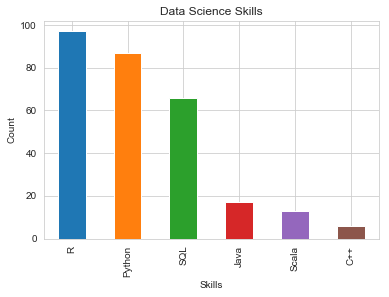

In [326]:
import seaborn as sns
sns.set_style('whitegrid') 

skill_series = pd.Series(skill_set)
skill_series.sort_values(ascending=False).plot(kind = 'bar')
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()